In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In /home/sophie/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sophie/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sophie/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/sophie/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sophie/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

I'm going to test this method on just one dataset, so for now I've chosen Louvain arbitrarily. I'm using nodes from all 3 mu levels in together (0.2, 0.3, 0.4).

In [2]:
alg = 'Louvain'

In [3]:
X_train = pd.read_csv('../LFR_Graph_Data/1000_Node_Params/{0}_Data/all/node_x_train.csv'.format(alg), index_col=0)
y_train = pd.read_csv('../LFR_Graph_Data/1000_Node_Params/{0}_Data/all/node_y_train.csv'.format(alg), index_col=0)
X_test = pd.read_csv('../LFR_Graph_Data/1000_Node_Params/{0}_Data/all/node_x_test.csv'.format(alg), index_col=0)
y_test = pd.read_csv('../LFR_Graph_Data/1000_Node_Params/{0}_Data/all/node_y_test.csv'.format(alg), index_col=0)

In [4]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

/home/sophie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Quickly showing that the accuracy on the test set is high enough to justify believing any of the features are predictive:

In [5]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.813


In [6]:
feature_list = list(X_train.columns)
feature_importance = {}
for j, feature in enumerate(feature_list):
    feature_importance[feature] = rf.feature_importances_[j]

In [7]:
df_importances = pd.DataFrame(feature_importance, index=[0])

Using the random forest feature ranking, as we've been doing so far:

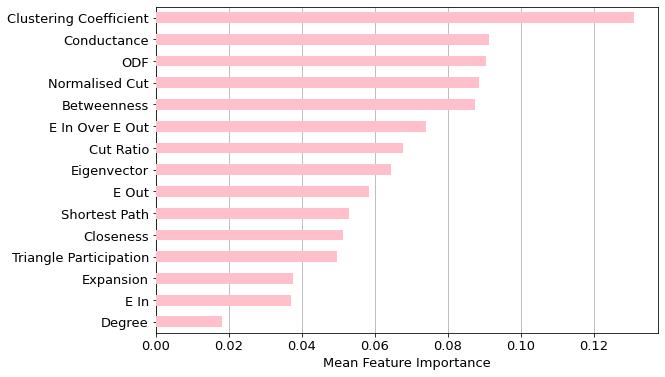

In [8]:
feature_ranking = df_importances.mean().sort_values(ascending=False)
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="pink", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

Now I'm trying the permutation importance that they suggest. This also allows you to add error bars quite easily.

[ 3.00000000e-03  3.36333333e-02  6.10000000e-02  3.63333333e-03
  6.50000000e-03  1.13333333e-03  1.50000000e-03  6.46666667e-03
  3.46666667e-03  5.06666667e-03 -3.33333333e-05  6.43333333e-03
  4.20000000e-03  3.20000000e-03  2.30000000e-03]


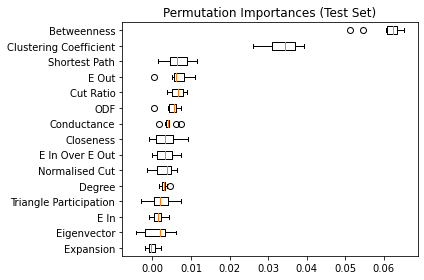

In [10]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=54)
print(result.importances_mean)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()